In [597]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [545]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = pd.read_csv("./berlin-airbnb-data/listings_summary.csv")

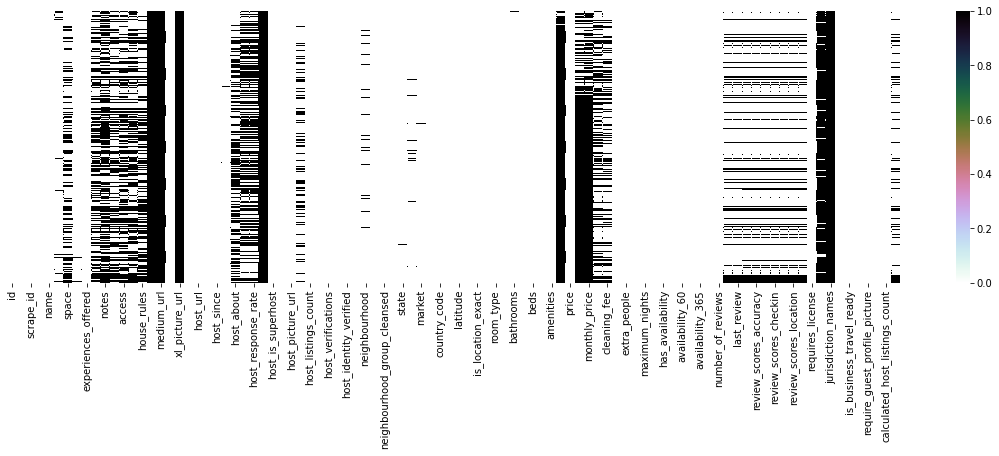

In [546]:
#source : https://www.kaggle.com/mhmdpkts/predict-price-ann-data-cleaning-future-engineering
fig, ax = plt.subplots(figsize = (20, 5))
sns.heatmap(df.isna(), cmap = "cubehelix_r", yticklabels='')
plt.show()

A simple heat map shows the state of missing values, a presence of black line shows that a value is missing. From a quick observation we find that some columns have a large amount of data missing in them. We will verify this numerically, 


In [547]:
#Calculate the percentage of the missing values in 
((len(df)-df.count())/len(df)*100).sort_values(ascending = False)

xl_picture_url                      100.000000
jurisdiction_names                  100.000000
thumbnail_url                       100.000000
medium_url                          100.000000
host_acceptance_rate                100.000000
square_feet                          98.022348
license                              92.736786
monthly_price                        88.209471
weekly_price                         83.677723
notes                                68.007272
host_response_rate                   57.178964
host_response_time                   57.174530
interaction                          53.857751
access                               51.946612
host_about                           50.385775
house_rules                          49.232884
neighborhood_overview                48.829372
transit                              42.195814
security_deposit                     41.508514
space                                37.832565
cleaning_fee                         31.686768
host_neighbou

High percentage of missing values are present in some columns, we are going to cut down any columns that have more than 40% of data missing in them. 


In [548]:
col_list_to_drop = [] 

columns = df.columns
length = len(df)
for i in columns:  
    rate = round(df[i].isna().sum()/length,3)   
    if rate > 0.45:
        col_list_to_drop.append(i)

For our analysis, we are not going to need any data related to host's personnel details. Nether do we have any value with the available url's. Since we are not going to perform any form of text processing, we will delete all those columns that have either textual data, are related to host's personnel details and contain textual data in them. Since the work is to predict the pricing of a new hosting, we will not use the columns related to the reviews, as its expected to have not reviews at the time of publishing the property for first time. The location details are provided using features like lattitude, longitude, street names, city and others. For our modeling we would not be using the details of city, since this data is assumed to be of Berlin.

The availability would not help to provide a cost estimation, the availability could be instead used to calculate the earning of a host.

In [549]:
col_list_to_drop .extend (["id",
                         "listing_url",
                         "smart_location",
                         "street",
                         "city",
                         "state",
                         "market",
                         "host_total_listings_count", 
                         "scrape_id", 
                         "experiences_offered", 
                         "last_scraped", 
                         "name", 
                         "host_acceptance_rate", 
                         "summary", 
                         "space", 
                         "description", 
                         "neighborhood_overview",
                         "notes",
                         "transit", 
                         "access",
                         "interaction",
                         "house_rules",
                         "thumbnail_url", 
                         "medium_url", 
                         "picture_url", 
                         "xl_picture_url",
                         "availability_30",
                         "availability_60",
                         "availability_90",
                         "availability_365",
                         "host_id",
                         "host_url", 
                         "host_name", 
                         "host_since", 
                         "host_location", 
                         "host_about",
                         "host_response_time", 
                         "host_response_rate",
                         "host_thumbnail_url", 
                         "host_picture_url",
                         "host_neighbourhood",
                         "host_listings_count",
                         "host_verifications",
                         "host_has_profile_pic", 
                         "host_identity_verified",
                         "calendar_updated", 
                         "calendar_last_scraped", 
                         "first_review", 
                         "last_review", 
                         "license", 
                         "jurisdiction_names", 
                         "require_guest_profile_picture", 
                         "requires_license", 
                         "is_location_exact", 
                         "require_guest_phone_verification", 
                         "calculated_host_listings_count",
                         "review_scores_value", 
                         "review_scores_rating", 
                         "review_scores_accuracy",
                         "review_scores_cleanliness", 
                         "reviews_per_month", 
                         "review_scores_checkin", 
                         "review_scores_communication", 
                         "review_scores_location",
                         "review_scores_value"])

df.drop(list(set(col_list_to_drop)), axis=1, inplace=True)

In [550]:
df.describe(include="all")

,host_is_superhost,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,country_code,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,number_of_reviews,instant_bookable,is_business_travel_ready,cancellation_policy
count,22526,21421,22552,22552,21896,22552,22552,22552.000000,22552.000000,22552,22552,22552.000000,22520.000000,22534.000000,22512.000000,22552,22552,22552,13191,15406,22552.000000,22552,22552.000000,2.255200e+04,22552,22552.000000,22552,22552,22552
unique,2,91,136,12,215,1,1,NaN,NaN,33,3,NaN,NaN,NaN,NaN,5,19985,295,142,112,NaN,65,NaN,NaN,1,NaN,2,1,5
top,f,Neukölln,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,10245,DE,Germany,NaN,NaN,Apartment,Private room,NaN,NaN,NaN,NaN,Real Bed,{},$30.00,$0.00,$0.00,NaN,$0.00,NaN,NaN,t,NaN,f,f,flexible
freq,19515,3209,1325,5497,855,22552,22552,NaN,NaN,20225,11534,NaN,NaN,NaN,NaN,21766,75,1387,5319,1865,NaN,10863,NaN,NaN,22552,NaN,15518,22552,9102
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.509824,13.406107,NaN,NaN,2.637460,1.092695,1.161134,1.620558,NaN,NaN,NaN,NaN,NaN,1.332121,NaN,7.157059,1.030505e+05,NaN,17.840679,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030825,0.057964,NaN,NaN,1.510548,0.329894,0.646156,1.174840,NaN,NaN,NaN,NaN,NaN,0.835034,NaN,40.665073,9.640519e+06,NaN,36.769624,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.345803,13.103557,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000e+00,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.489065,13.375411,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.000000,2.000000e+01,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.509079,13.416779,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.000000,1.124000e+03,NaN,5.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.532669,13.439259,NaN,NaN,3.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,4.000000,1.125000e+03,NaN,16.000000,NaN,NaN,NaN


For simplicity, we are going to check the neighbourhood based grouping.


In [551]:
neighbourhood_columns = ['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode', 'country_code', 'country']
df.drop(neighbourhood_columns, axis=1, inplace=True)
col_list_to_drop.extend(neighbourhood_columns)

We will drop those columns that are categorical and have no unique values.

In [552]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        print("Dropping Column {}".format(col))
        df.drop(col, axis=1, inplace=True)

Dropping Column has_availability
Dropping Column is_business_travel_ready


We are going to filter the columns that depict prices, from the above summary details of all columns we have the following columns that describe prices "price", "weekly_price", "monthly_price", "security_deposit","cleaning_fee", "extra_people".

In [553]:
df.describe(include="all")

,host_is_superhost,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,cancellation_policy
count,22526,22552.000000,22552.000000,22552,22552,22552.000000,22520.000000,22534.000000,22512.000000,22552,22552,22552,13191,15406,22552.000000,22552,22552.000000,2.255200e+04,22552.000000,22552,22552
unique,2,NaN,NaN,33,3,NaN,NaN,NaN,NaN,5,19985,295,142,112,NaN,65,NaN,NaN,NaN,2,5
top,f,NaN,NaN,Apartment,Private room,NaN,NaN,NaN,NaN,Real Bed,{},$30.00,$0.00,$0.00,NaN,$0.00,NaN,NaN,NaN,f,flexible
freq,19515,NaN,NaN,20225,11534,NaN,NaN,NaN,NaN,21766,75,1387,5319,1865,NaN,10863,NaN,NaN,NaN,15518,9102
mean,NaN,52.509824,13.406107,NaN,NaN,2.637460,1.092695,1.161134,1.620558,NaN,NaN,NaN,NaN,NaN,1.332121,NaN,7.157059,1.030505e+05,17.840679,NaN,NaN
std,NaN,0.030825,0.057964,NaN,NaN,1.510548,0.329894,0.646156,1.174840,NaN,NaN,NaN,NaN,NaN,0.835034,NaN,40.665073,9.640519e+06,36.769624,NaN,NaN
min,NaN,52.345803,13.103557,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000e+00,0.000000,NaN,NaN
25%,NaN,52.489065,13.375411,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.000000,2.000000e+01,1.000000,NaN,NaN
50%,NaN,52.509079,13.416779,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.000000,1.124000e+03,5.000000,NaN,NaN
75%,NaN,52.532669,13.439259,NaN,NaN,3.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,4.000000,1.125000e+03,16.000000,NaN,NaN


In [554]:
df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)
df.cleaning_fee = df.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float)
df.security_deposit = df.security_deposit.str.replace('$', '').str.replace(',', '').astype(float)
df.extra_people = df.extra_people.str.replace('$', '').str.replace(',', '').astype(float)


In [555]:
print(df['price'].isna().sum())
print(df['cleaning_fee'].isna().sum())
print(df['security_deposit'].isna().sum())
print(df['extra_people'].isna().sum())

0
7146
9361
0


Replacing all the missing values of cleaning fee and security deposit to zero and merging the price, cleaning_fee and security_deposit columns. The resultant total_price shows a skewed distribution, with not much data beyond 5000 Euros. Dropping all rows that have price columns either set to 0 or are greater than 5000


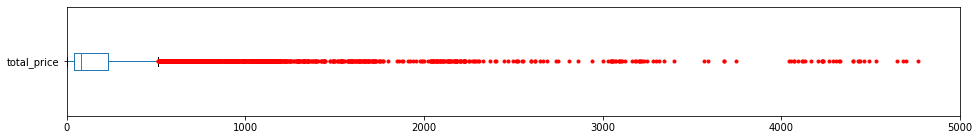

In [556]:
df['cleaning_fee'].fillna(0, inplace=True)
df['security_deposit'].fillna(0, inplace=True)
df['total_price'] = df['price'] + df['cleaning_fee'] + df['security_deposit']
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
df['total_price'].plot(kind='box', xlim=(0, 5000), vert=False, flierprops=red_square, figsize=(16,2))
df.drop(df[ (df.price > 5000) | (df.price == 0) ].index, axis=0, inplace=True)
#drop the columns that were merged 
df.drop(['cleaning_fee', 'security_deposit', 'price'], inplace=True, axis = 1)

In [557]:
df.describe(include="all")

,host_is_superhost,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,cancellation_policy,total_price
count,22496,22521.000000,22521.000000,22521,22521,22521.000000,22489.000000,22503.000000,22481.000000,22521,22521,22521.000000,22521.000000,22521.000000,2.252100e+04,22521.000000,22521,22521,22521.000000
unique,2,NaN,NaN,33,3,NaN,NaN,NaN,NaN,5,19970,NaN,NaN,NaN,NaN,NaN,2,5,NaN
top,f,NaN,NaN,Apartment,Private room,NaN,NaN,NaN,NaN,Real Bed,{},NaN,NaN,NaN,NaN,NaN,f,flexible,NaN
freq,19486,NaN,NaN,20216,11508,NaN,NaN,NaN,NaN,21735,74,NaN,NaN,NaN,NaN,NaN,15508,9080,NaN
mean,NaN,52.509840,13.406166,NaN,NaN,2.637361,1.092712,1.161045,1.620568,NaN,NaN,1.331380,8.265397,7.160384,1.031910e+05,17.859420,NaN,NaN,197.062386
std,NaN,0.030836,0.057948,NaN,NaN,1.509021,0.329983,0.645998,1.173845,NaN,NaN,0.834745,11.155132,40.687817,9.647152e+06,36.788259,NaN,NaN,336.835524
min,NaN,52.345803,13.103557,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,1.000000,1.000000e+00,0.000000,NaN,NaN,8.000000
25%,NaN,52.489056,13.375606,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,2.000000,2.000000e+01,1.000000,NaN,NaN,41.000000
50%,NaN,52.509117,13.416834,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,5.000000,2.000000,1.124000e+03,5.000000,NaN,NaN,80.000000
75%,NaN,52.532678,13.439284,NaN,NaN,3.000000,1.000000,1.000000,2.000000,NaN,NaN,1.000000,15.000000,4.000000,1.125000e+03,16.000000,NaN,NaN,228.000000


In [558]:
#source : https://www.kaggle.com/mhmdpkts/predict-price-ann-data-cleaning-future-engineering
#create distance feature from latitude and longtitude 
from geopy.distance import great_circle
def distance_from_berlin(lat, lon):
    berlin_centre = (52.5027778, 13.404166666666667)
    record = (lat, lon)
    #returns surface distance in kilometers
    return great_circle(berlin_centre, record).km

#add distanse dataset
df['distance'] = df.apply(lambda x: distance_from_berlin(x.latitude, x.longitude), axis=1)
df.drop(['latitude', 'longitude'], inplace=True, axis=1)

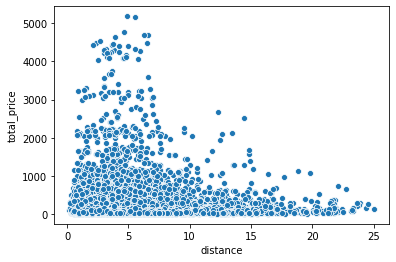

In [559]:
sns.scatterplot(x=df['distance'], y = df['total_price'])
plt.show()

Observation : With the increase in distance from the center, we find the prices going comparatively down.

In [560]:
#Generate a Categorical and Numerical Column List
numerical_columns = []
categoical_columns = []
for column in df.columns:
    if df[column].dtype == 'object':
        categoical_columns.append(column)
    else:
        numerical_columns.append(column)

In [561]:
df.describe(include="all")

,host_is_superhost,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,cancellation_policy,total_price,distance
count,22496,22521,22521,22521.000000,22489.000000,22503.000000,22481.000000,22521,22521,22521.000000,22521.000000,22521.000000,2.252100e+04,22521.000000,22521,22521,22521.000000,22521.000000
unique,2,33,3,NaN,NaN,NaN,NaN,5,19970,NaN,NaN,NaN,NaN,NaN,2,5,NaN,NaN
top,f,Apartment,Private room,NaN,NaN,NaN,NaN,Real Bed,{},NaN,NaN,NaN,NaN,NaN,f,flexible,NaN,NaN
freq,19486,20216,11508,NaN,NaN,NaN,NaN,21735,74,NaN,NaN,NaN,NaN,NaN,15508,9080,NaN,NaN
mean,NaN,NaN,NaN,2.637361,1.092712,1.161045,1.620568,NaN,NaN,1.331380,8.265397,7.160384,1.031910e+05,17.859420,NaN,NaN,197.062386,4.547260
std,NaN,NaN,NaN,1.509021,0.329983,0.645998,1.173845,NaN,NaN,0.834745,11.155132,40.687817,9.647152e+06,36.788259,NaN,NaN,336.835524,2.664719
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,1.000000,1.000000e+00,0.000000,NaN,NaN,8.000000,0.198956
25%,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,2.000000,2.000000e+01,1.000000,NaN,NaN,41.000000,2.976668
50%,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,5.000000,2.000000,1.124000e+03,5.000000,NaN,NaN,80.000000,4.088234
75%,NaN,NaN,NaN,3.000000,1.000000,1.000000,2.000000,NaN,NaN,1.000000,15.000000,4.000000,1.125000e+03,16.000000,NaN,NaN,228.000000,5.550559


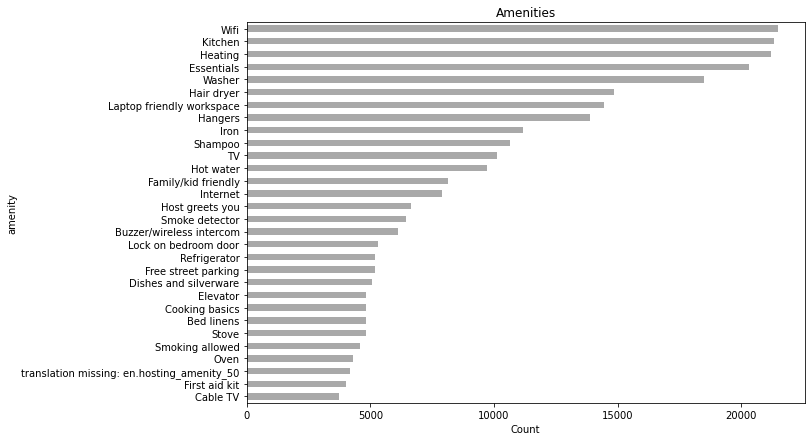

In [562]:
#source https://www.kaggle.com/brittabettendorf/predicting-prices-xgboost-feature-engineering
from collections import Counter
results = Counter()
df['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

results.most_common(30)
sub_df = pd.DataFrame(results.most_common(30), columns=['amenity', 'count'])
# plot the Top 20
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,7), legend=False, color='darkgrey',
                                                      title='Amenities')
plt.xlabel('Count');


In [563]:
df['Laptop_friendly_workspace'] = df['amenities'].str.contains('Laptop friendly workspace')
df['TV'] = df['amenities'].str.contains('TV')
df['Family_kid_friendly'] = df['amenities'].str.contains('Family/kid friendly')
df['Host_greets_you'] = df['amenities'].str.contains('Host greets you')
df['Smoking_allowed'] = df['amenities'].str.contains('Smoking allowed')
df.drop(['amenities'], axis=1, inplace=True)

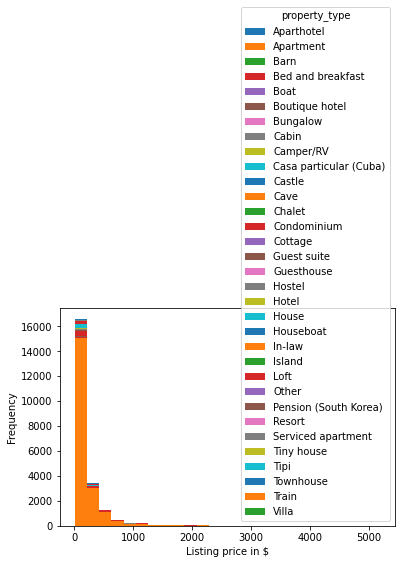

In [564]:
df.pivot(columns = 'property_type', values = 'total_price').plot.hist(stacked = True, bins=25)
plt.xlabel('Listing price in $')
plt.show()

In [565]:
property_mapping = {'Guesthouse':'Guesthouse', 'Apartment':'Apartment', 'Condominium':'others', 'Loft':'others','House':'Apartment','Serviced apartment':'others','Townhouse':'others','Boutique hotel':'others','Bed and breakfast':'others',
                    'Bungalow':'others','Boat':'others','Guest suite':'others','Other':'others','Island':'others',
                    'Hostel':'others','Train':'others','Camper/RV':'others','Houseboat':'others','Cabin':'others',
                    'Cottage':'others','Tiny house':'others','Chalet':'others','Castle':'others','Villa':'others',
                    'Aparthotel':'others','Hotel':'Hotel','Tipi':'others','Resort':'Resort','In-law':'others',
                    'Cave':'others','Barn':'others','Pension (South Korea)':'others','Guesthouse':'others','Casa particular (Cuba)':'others','others':'others'}
df['property_type']=df['property_type'].map(property_mapping)

Different property_types can be merged in to a smaller categorical set.

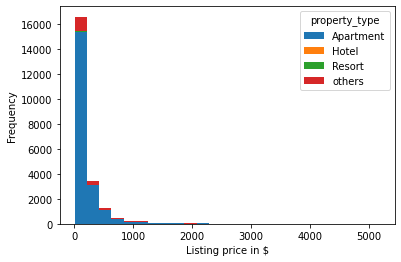

In [566]:
df['property_type'].unique()
df.pivot(columns = 'property_type', values = 'total_price').plot.hist(stacked = True, bins=25)
plt.xlabel('Listing price in $')
plt.show()

In [567]:
df.head()

,host_is_superhost,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,cancellation_policy,total_price,distance,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed
0,t,others,Entire home/apt,3,1.0,1.0,2.0,Real Bed,1,28.0,4,1125,118,f,strict_14_with_grace_period,290.0,3.533182,True,True,True,False,False
1,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,0.0,2,40,6,f,flexible,17.0,5.085573,True,False,False,False,False
2,f,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,2,20.0,62,1125,143,t,strict_14_with_grace_period,340.0,3.695677,True,False,True,False,False
3,f,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,1,18.0,5,360,25,f,strict_14_with_grace_period,306.0,3.755285,True,False,False,True,False
4,t,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,1,24.0,2,10,197,f,moderate,42.0,4.550423,True,False,True,False,False


In [568]:
#convert all boolean to integer 0 or 1
def object2bool(x):
    if x=="t" or x=="T" or x==True:
        return 1.0
    elif x=="f" or x=="F" or x==False:
        return 0.0
    else:
        return None

In [569]:
for i in ["host_is_superhost", "instant_bookable", "Laptop_friendly_workspace","TV","Family_kid_friendly","Host_greets_you","Smoking_allowed"]:
    df[i] = df[i].map(object2bool)

In [570]:
#now fill the missing values with 0
df.beds.fillna(0,inplace=True)
df.bedrooms.fillna(0,inplace=True)
df.bathrooms.fillna(0,inplace=True)

In [571]:
#Convert all categorical values in to numerical
#nominal_categorical bed_type and property_type
for i in ["bed_type","property_type","cancellation_policy","room_type"]:
    x = df[[i]]
    x.room_type = pd.Categorical(x[i])
    df.drop([i], inplace=True, axis=1)
    dummies = pd.get_dummies(x, prefix = i)
    df = pd.concat([df,dummies], axis=1)

/home/arunhiremath/sfsu/data_mining/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
/home/arunhiremath/sfsu/data_mining/venv/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [572]:
#Calculate the percentage of the missing values in 
((len(df)-df.count())/len(df)*100).sort_values(ascending = False)

host_is_superhost                                  0.111008
maximum_nights                                     0.000000
TV                                                 0.000000
Laptop_friendly_workspace                          0.000000
distance                                           0.000000
total_price                                        0.000000
instant_bookable                                   0.000000
number_of_reviews                                  0.000000
minimum_nights                                     0.000000
Host_greets_you                                    0.000000
extra_people                                       0.000000
guests_included                                    0.000000
beds                                               0.000000
bedrooms                                           0.000000
bathrooms                                          0.000000
accommodates                                       0.000000
Family_kid_friendly                     

In [573]:
#detect outliers
#outlier detection with z score
def detect_outlier(data_1):
    feature_outliers=[]
    threshold=7
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    counter=0
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            feature_outliers.append(counter)
        counter += 1
    return feature_outliers

In [576]:
outliers = np.array([])
print("--Feature and Outlier Counts--\n")
for i in df.columns:
    f_out = detect_outlier(df[i])
    outliers = np.concatenate((outliers,np.asarray(f_out)))
    print(i ," outlier count :",len(f_out))
                              
outliers = np.unique(outliers,0)
print("Total Unique Outlier Index Count:",len(outliers))

--Feature and Outlier Counts--

host_is_superhost  outlier count : 0
accommodates  outlier count : 36
bathrooms  outlier count : 29
bedrooms  outlier count : 20
beds  outlier count : 47
guests_included  outlier count : 52
extra_people  outlier count : 28
minimum_nights  outlier count : 18
maximum_nights  outlier count : 3
number_of_reviews  outlier count : 60
instant_bookable  outlier count : 0
total_price  outlier count : 82
distance  outlier count : 10
Laptop_friendly_workspace  outlier count : 0
TV  outlier count : 0
Family_kid_friendly  outlier count : 0
Host_greets_you  outlier count : 0
Smoking_allowed  outlier count : 0
bed_type_Airbed  outlier count : 23
bed_type_Couch  outlier count : 72
bed_type_Futon  outlier count : 240
bed_type_Pull-out Sofa  outlier count : 0
bed_type_Real Bed  outlier count : 0
property_type_Apartment  outlier count : 0
property_type_Hotel  outlier count : 31
property_type_Resort  outlier count : 3
property_type_others  outlier count : 0
cancellation_pol

In [580]:
clean_data = df.drop(outliers,axis=0)
clean_data.describe()

,host_is_superhost,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,total_price,distance,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,property_type_Apartment,property_type_Hotel,property_type_Resort,property_type_others,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,21484.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,2.150800e+04,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000,21508.000000
mean,0.133122,2.625628,1.088897,1.159336,1.605635,1.325925,8.205691,6.828575,6.152696e+04,16.994421,0.311047,196.176306,4.555035,0.642598,0.453738,0.361121,0.296355,0.203831,0.000465,0.001581,0.004417,0.020086,0.973452,0.916822,0.001395,0.000139,0.081644,0.403943,0.315789,0.278176,0.001488,0.000604,0.476985,0.512693,0.010322
std,0.339715,1.464694,0.312926,0.639407,1.129438,0.798336,10.993609,21.020639,7.138766e+06,33.017884,0.462933,329.751018,2.667428,0.479246,0.497867,0.480337,0.456660,0.402854,0.021558,0.039729,0.066315,0.140296,0.160763,0.276158,0.037322,0.011810,0.273828,0.490698,0.464840,0.448111,0.038544,0.024578,0.499482,0.499850,0.101073
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,8.000000,0.198956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000e+01,1.000000,0.000000,42.000000,2.982166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,1.124000e+03,5.000000,0.000000,80.000000,4.091531,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,3.000000,1.000000,1.000000,2.000000,1.000000,15.000000,4.000000,1.125000e+03,16.000000,1.000000,229.000000,5.558063,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,16.000000,8.500000,12.000000,22.000000,16.000000,250.000000,1000.000000,1.000000e+09,305.000000,1.000000,5180.000000,25.012109,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [589]:
#rearrange columns, push total_price to the end
column_list = [col for col in df.columns if col != "total_price"]
column_list.append("total_price")
df = df[column_list]
column_list.pop()

'total_price'

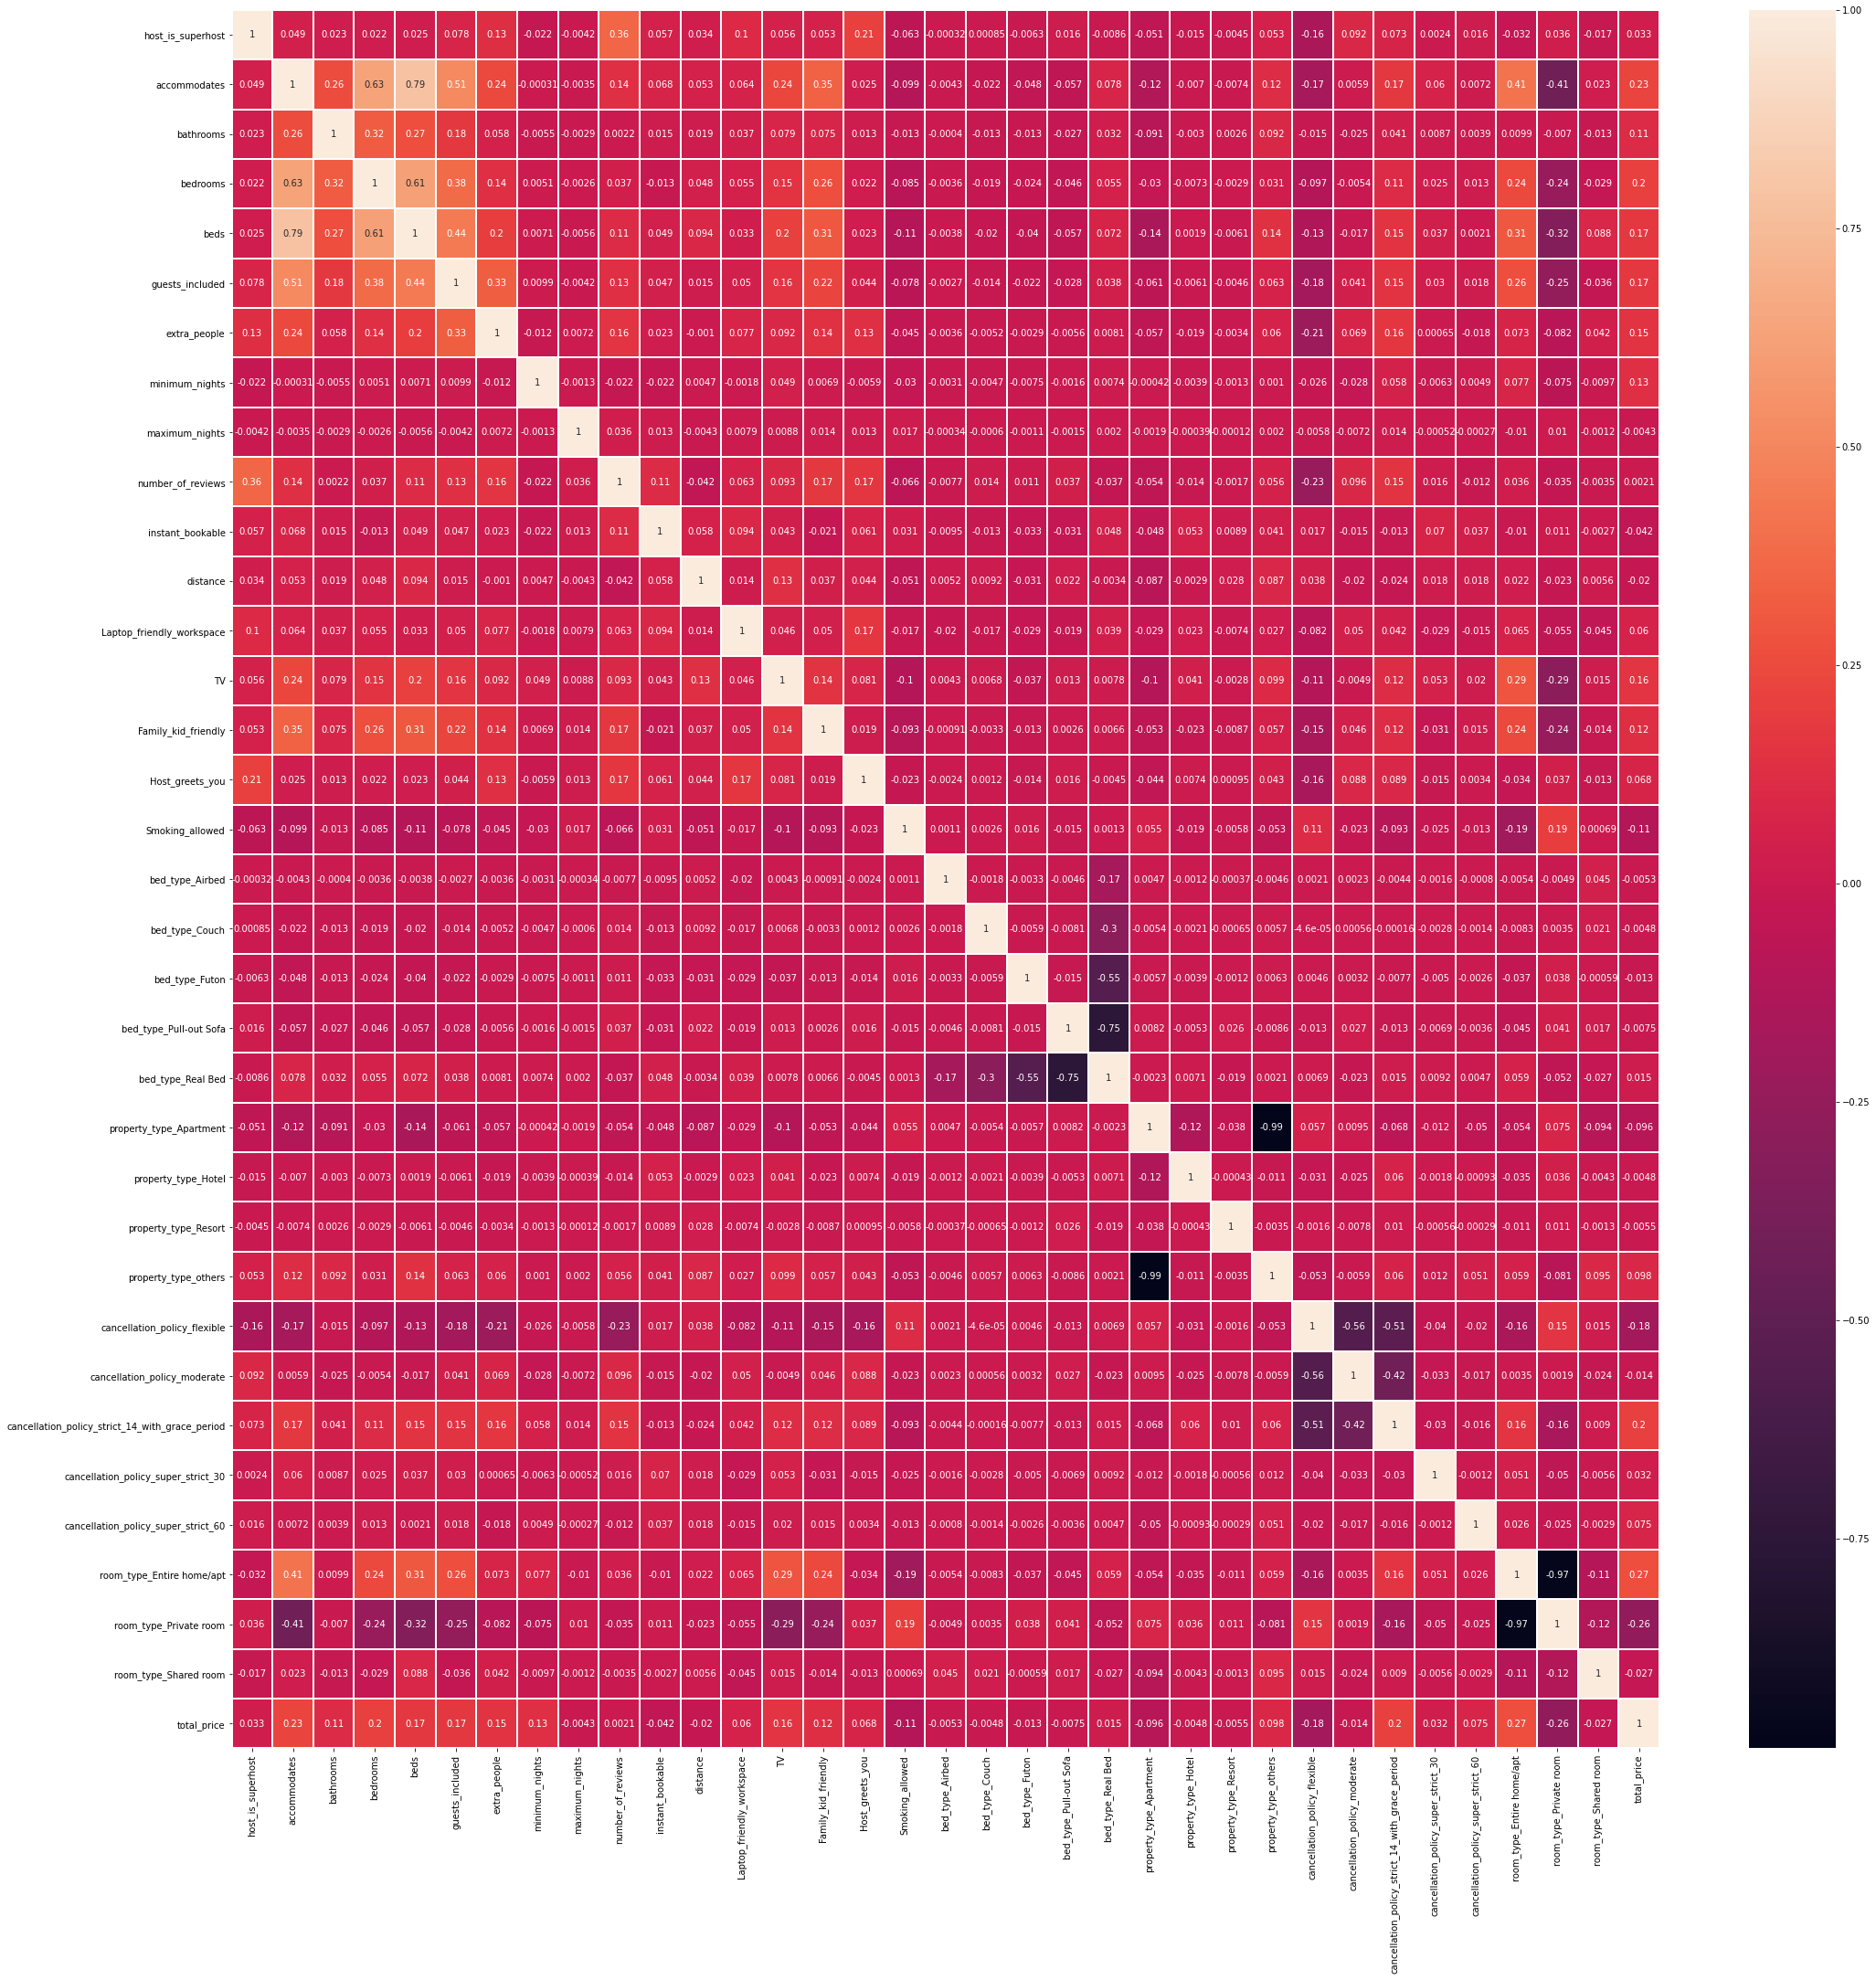

In [587]:
f, ax = plt.subplots( figsize=(35,35) )
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

In [ ]:
# import train_test_split function
from sklearn.model_selection import train_test_split
# import metrics
from sklearn.metrics import mean_squared_error, r2_score

import re
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

# split our data
X_train, X_test, y_train, y_test = train_test_split(df[column_list], df['total_price'], test_size=0.2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
booster = xgb.XGBRegressor()
from sklearn.model_selection import GridSearchCV

# create Grid
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

In [602]:
# instantiate xgboost with best parameters
booster = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                           max_depth=6, n_estimators=200, random_state=4)

# train
booster.fit(X_train, y_train)

# predict
y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

In [603]:

RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {round(RMSE, 4)}")



RMSE: 275.5496


In [604]:
r2 = r2_score(y_test, y_pred_test)
r2
print(f"r2: {round(r2, 4)}")


r2: 0.2908
